# Inicialización

In [1]:
from skimage import io
from skimage import data
from skimage import transform as tf
from skimage.feature import (match_descriptors, corner_peaks, corner_harris,
                             plot_matches, BRIEF, ORB)
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

In [2]:
# Paquetes necesarios para la morfología matemática
from skimage.morphology import erosion, dilation, opening, closing
# Elementos estructurales
from skimage.morphology import disk, diamond, ball, rectangle

In [3]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.filters import threshold_otsu, threshold_local, threshold_niblack, threshold_sauvola

from skimage.morphology import label
from skimage.measure import regionprops

In [4]:
from scipy import ndimage as ndi
from skimage.segmentation import clear_border

In [5]:
# Defino una función para mostrar una imagen por pantalla con el criterio que considero más acertado
def imshow(img):
    fig, ax = plt.subplots(figsize=(7, 7))
    # El comando que realmente muestra la imagen
    ax.imshow(img,cmap=plt.cm.gray)
    # Para evitar que aparezcan los números en los ejes
    ax.set_xticks([]), ax.set_yticks([])
    plt.show()

## Cargar la imagen

In [6]:
pintura_puntos = rgb2gray(io.imread(fname='img/Pintura_Puntos.jpg'))

# Escribe tu código aquí

In [7]:
lista_algortimo_img_dicos=dict()
n_iteraciones = 4
min_area_region = 60
max_area_region = 450
max_top_imagenes = 7 

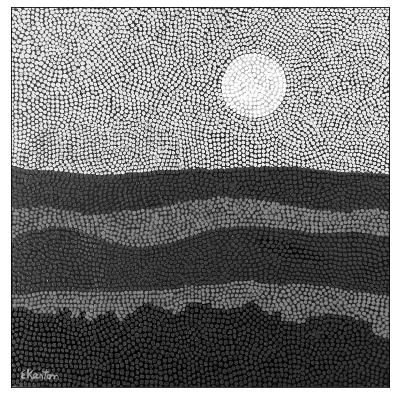

In [8]:
imshow(pintura_puntos)

In [9]:
imagenes_cercanas=dict()

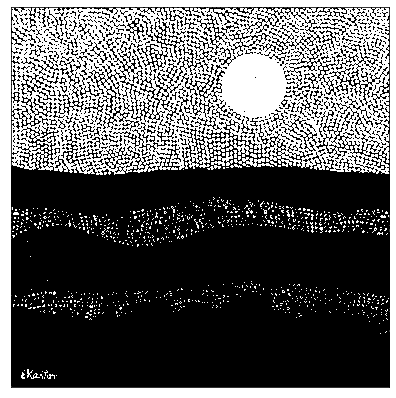

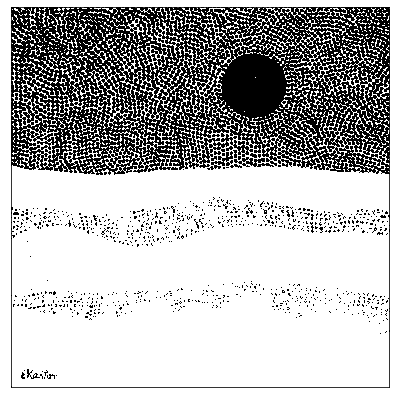

In [10]:
val_otsu=threshold_otsu(pintura_puntos)
img_otsu = pintura_puntos>val_otsu
imshow(img_otsu)
imshow(~img_otsu)

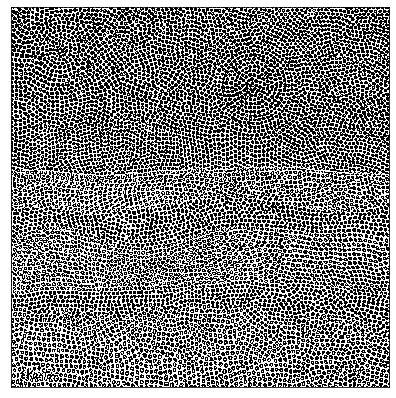

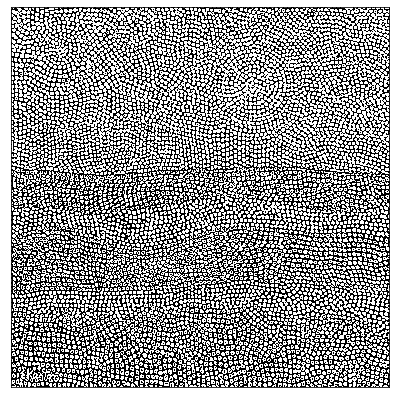

In [11]:
val_local=threshold_local(pintura_puntos, 15, 'mean')
img_local = pintura_puntos<val_local
imshow(img_local)
imshow(~img_local)
imagenes_cercanas["local_mean-15"]=~img_local

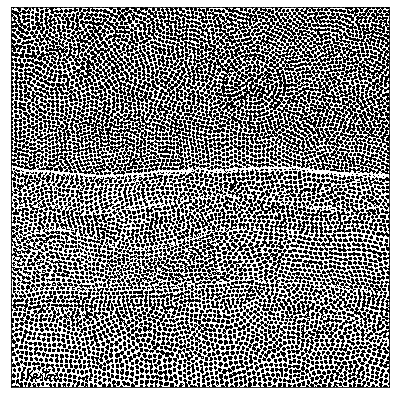

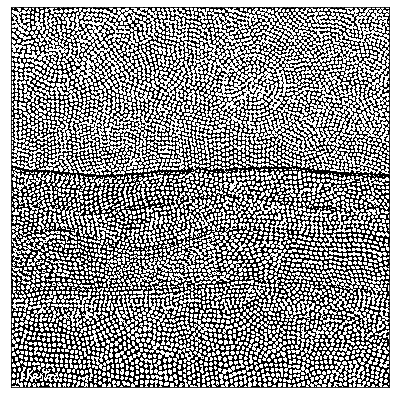

In [12]:
val_local=threshold_local(pintura_puntos, 35, 'mean')
img_local = pintura_puntos<val_local
imshow(img_local)
imshow(~img_local)
imagenes_cercanas["local_mean-35"]=~img_local

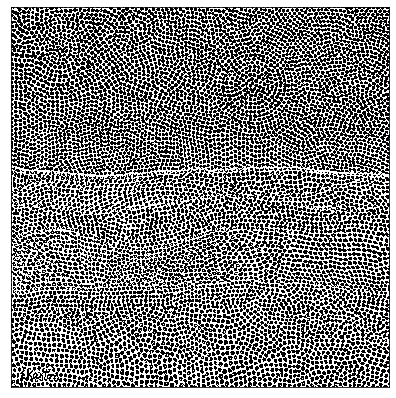

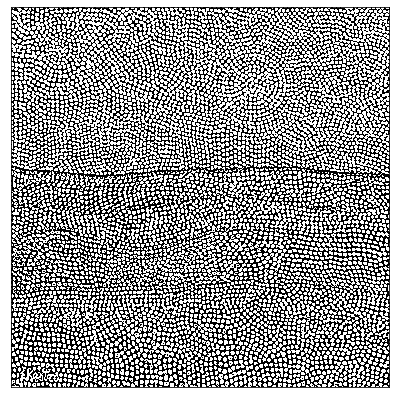

In [13]:
val_local=threshold_local(pintura_puntos, 45,  'gaussian')
img_local = pintura_puntos<val_local
imshow(img_local)
imshow(~img_local)
imagenes_cercanas["local_mean-55"]=~img_local

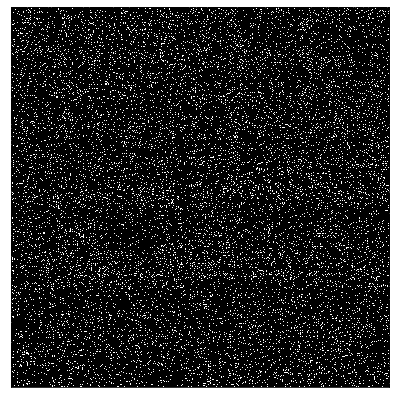

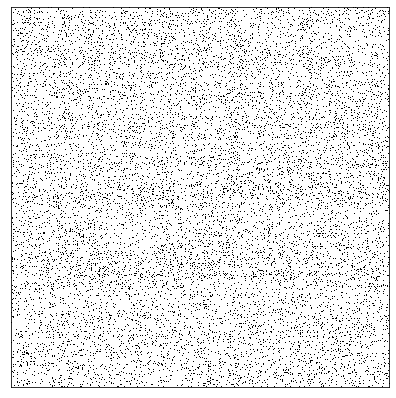

In [14]:
val_niblack=threshold_niblack(pintura_puntos, window_size=5, k=0.8)
img_niblack = pintura_puntos<val_niblack
imshow(img_niblack)
imshow(~img_niblack)

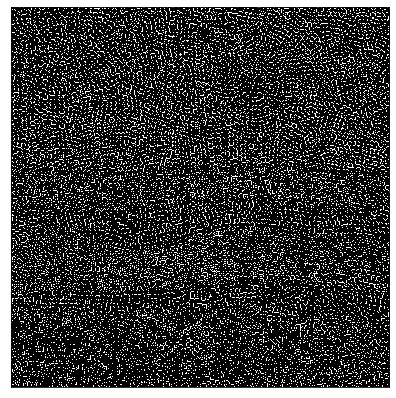

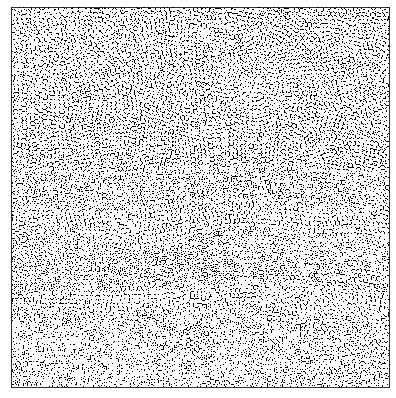

In [15]:
val_niblack=threshold_niblack(pintura_puntos, window_size=11, k=0.8)
img_niblack = pintura_puntos<val_niblack
imshow(img_niblack)
imshow(~img_niblack)

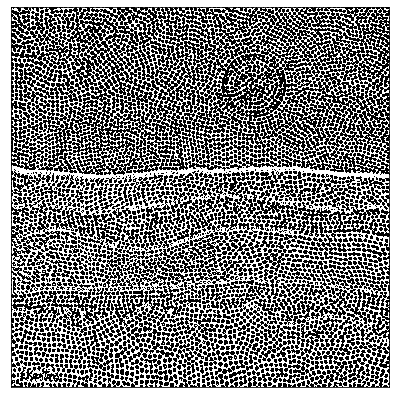

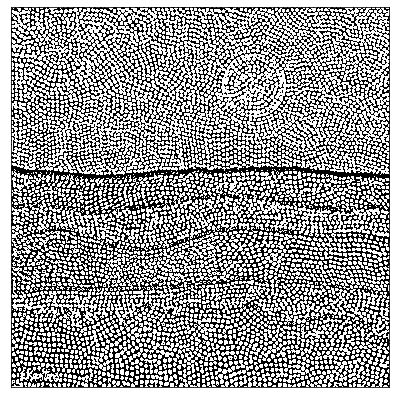

In [16]:
val_niblack=threshold_niblack(pintura_puntos, window_size=55, k=0.1)
img_niblack = pintura_puntos<val_niblack
imshow(img_niblack)
imshow(~img_niblack)
imagenes_cercanas["val_niblack"]=~img_niblack

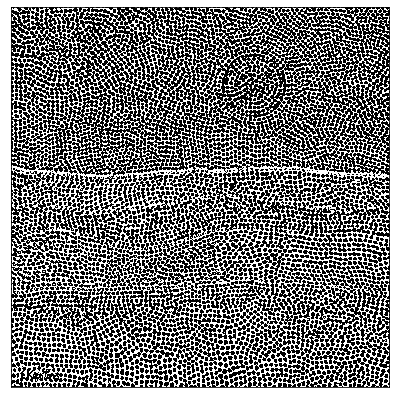

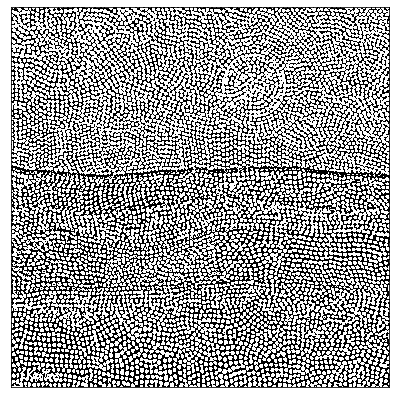

In [17]:
val_niblack=threshold_niblack(pintura_puntos, window_size=41, k=0.2)
img_niblack = pintura_puntos<val_niblack
imshow(img_niblack)
imshow(~img_niblack)
imagenes_cercanas["val_niblack-41"]=~img_niblack

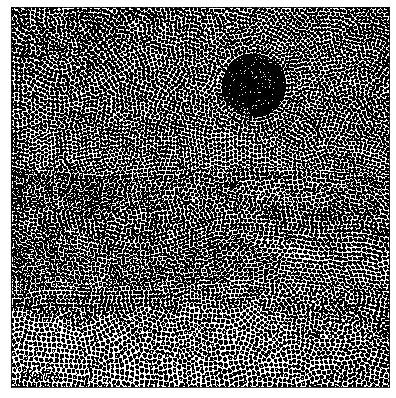

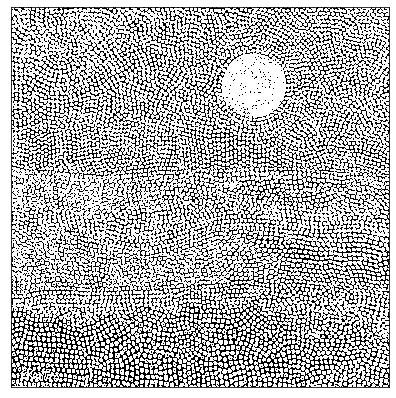

In [18]:
val_sauvola = threshold_sauvola(pintura_puntos, window_size=15, k=0.2)
img_sauvola = pintura_puntos < val_sauvola
imshow(img_sauvola)
imshow(~img_sauvola)

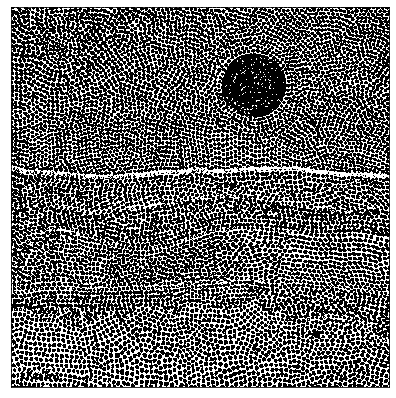

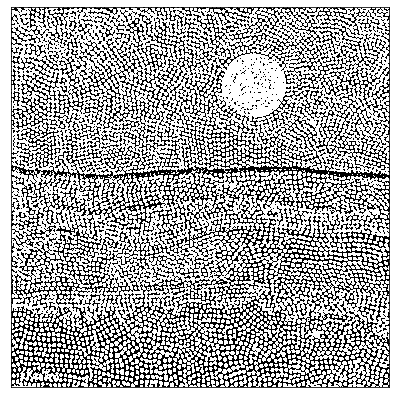

In [19]:
val_sauvola = threshold_sauvola(pintura_puntos, window_size=55, k=0.2)
img_sauvola = pintura_puntos < val_sauvola
imshow(img_sauvola)
imshow(~img_sauvola)

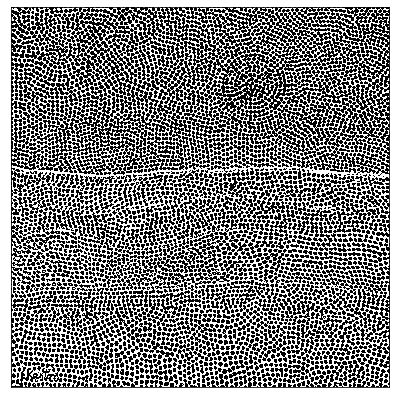

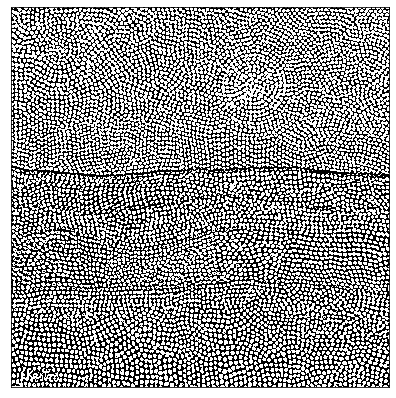

In [20]:
val_sauvola = threshold_sauvola(pintura_puntos, window_size=31, k=0.02)
img_sauvola = pintura_puntos < val_sauvola
imshow(img_sauvola)
imshow(~img_sauvola)
imagenes_cercanas["img_sauvola"]=~img_sauvola

# Posible resultado

In [21]:
def contar_regiones(imagen):
    label_imagen = label(imagen)    
    if min_area_region == 0 and max_area_region == 0:
        reg_props = regionprops(label_imagen)
        return len(reg_props)
    else:
        contador = 0
        for region in regionprops(label_imagen):        
            if min_area_region < region.area  and region.area< max_area_region:
                contador=contador+1
        return contador    

In [22]:
def mostar_imagenes_totales_por_algoritmo(morofologia):
    for key_algoritmo in imagenes_cercanas.keys():
        for key in lista_algortimo_img_dicos.keys():
            if morofologia+"-"+key_algoritmo==key:
                ndiscos=lista_algortimo_img_dicos[key]['ndiscos']
                algoritmo=lista_algortimo_img_dicos[key]['algoritmo']
                imagen=lista_algortimo_img_dicos[key]['imagen']
                print('Nro. Discos: {0} Algoritmo: {1}'.format(ndiscos,algoritmo))
                imshow(imagen)    

In [23]:
def mostar_imagenes_totales_por_clave(key_lista):
    ndiscos=lista_algortimo_img_dicos[key_lista]['ndiscos']
    algoritmo=lista_algortimo_img_dicos[key_lista]['algoritmo']
    imagen=lista_algortimo_img_dicos[key_lista]['imagen']
    print('Nro. Discos: {0} Algoritmo: {1} Método Morfología:{2}'.format(ndiscos,algoritmo,key_lista))
    imshow(imagen)    

In [24]:
def erosionar_imagen(imagen,ndimesion,forma=disk):
    ndiscos = 0
    img_resultado = []
    for n in range(1,ndimesion):        
        imagen_ndiscos = erosion(imagen, forma(n))
        total_discos = contar_regiones(imagen_ndiscos)
        if(total_discos>ndiscos):
            ndiscos = total_discos            
            img_resultado = imagen_ndiscos
    return img_resultado,ndiscos

In [25]:
for key in imagenes_cercanas.keys():
    print(key)
    img_resultado,ndiscos=erosionar_imagen(imagenes_cercanas[key],n_iteraciones)
    lista_algortimo_img_dicos["erosionar_imagen_disco-"+key]={"algoritmo":key,"ndiscos":ndiscos,"imagen":img_resultado}

local_mean-15
local_mean-35
local_mean-55
val_niblack
val_niblack-41
img_sauvola


Nro. Discos: 6833 Algoritmo: local_mean-15


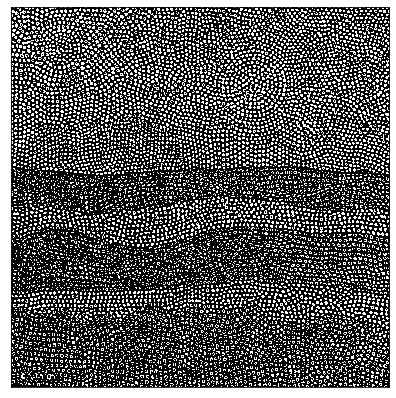

Nro. Discos: 6585 Algoritmo: local_mean-35


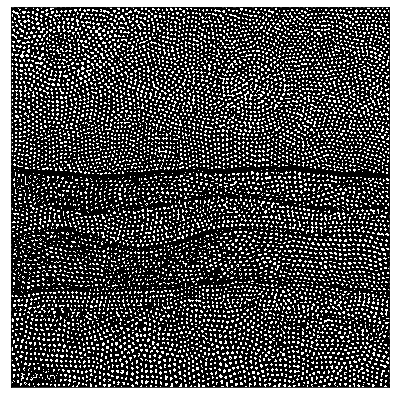

Nro. Discos: 6659 Algoritmo: local_mean-55


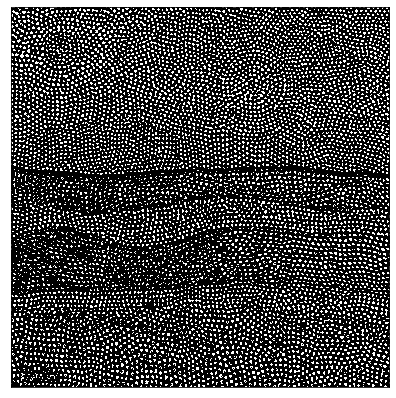

Nro. Discos: 6206 Algoritmo: val_niblack


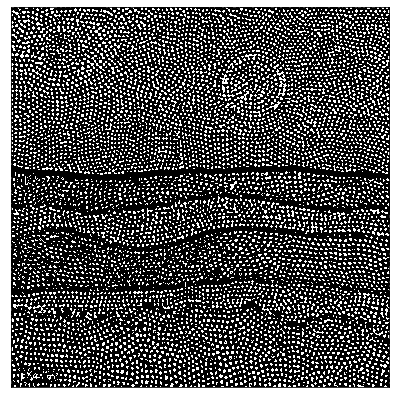

Nro. Discos: 6179 Algoritmo: val_niblack-41


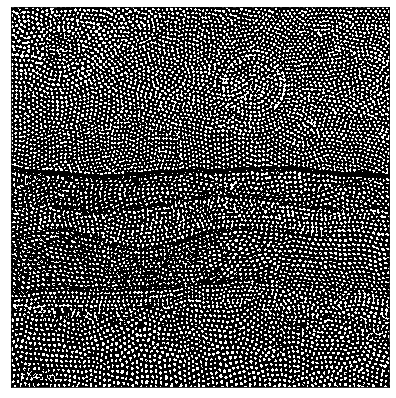

Nro. Discos: 6697 Algoritmo: img_sauvola


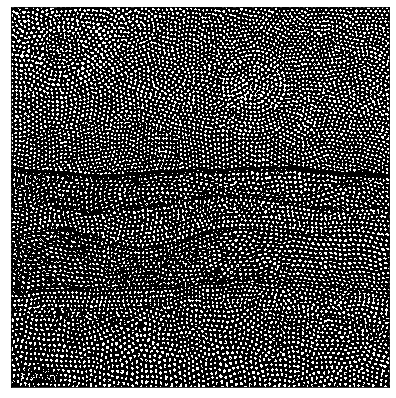

In [26]:
mostar_imagenes_totales_por_algoritmo("erosionar_imagen_disco")

In [27]:
for key in imagenes_cercanas.keys():
    print(key)
    img_resultado,ndiscos = erosionar_imagen(imagenes_cercanas[key],n_iteraciones,forma=diamond)
    lista_algortimo_img_dicos["erosionar_imagen_diamond-"+key]={"algoritmo":key,"ndiscos":ndiscos,"imagen":img_resultado}

local_mean-15
local_mean-35
local_mean-55
val_niblack
val_niblack-41
img_sauvola


Nro. Discos: 6833 Algoritmo: local_mean-15


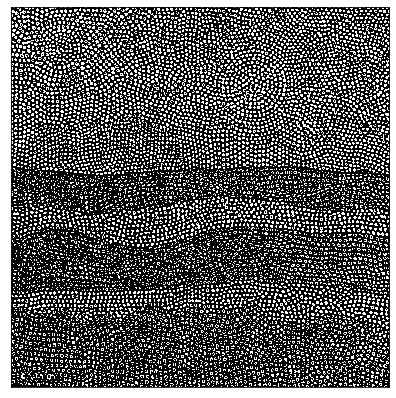

Nro. Discos: 6524 Algoritmo: local_mean-35


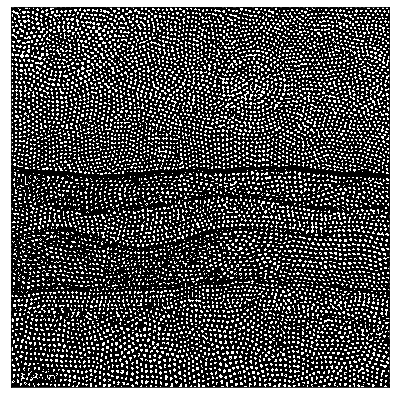

Nro. Discos: 6656 Algoritmo: local_mean-55


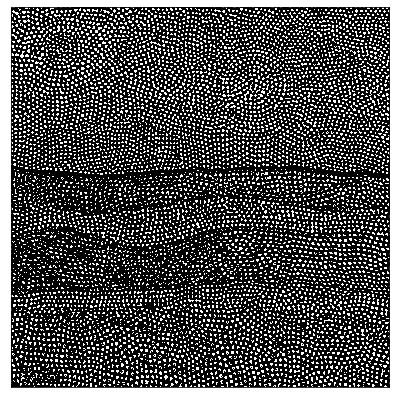

Nro. Discos: 6035 Algoritmo: val_niblack


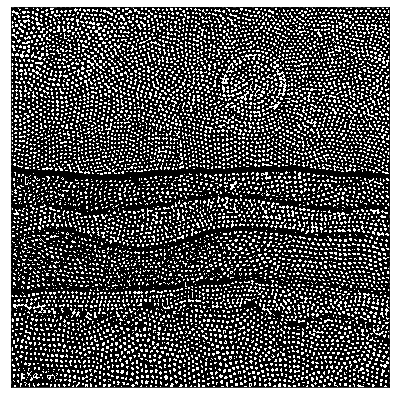

Nro. Discos: 5923 Algoritmo: val_niblack-41


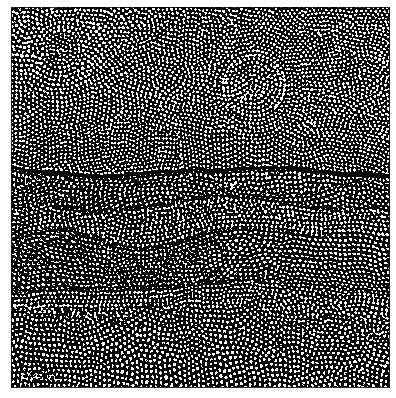

Nro. Discos: 6626 Algoritmo: img_sauvola


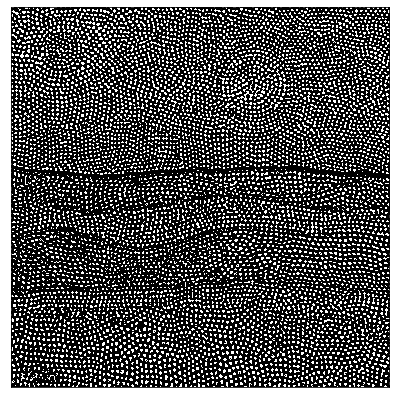

In [28]:
mostar_imagenes_totales_por_algoritmo("erosionar_imagen_diamond")

In [29]:
for key in imagenes_cercanas.keys():
    print(key)
    try:
        erosionar_imagen(imagenes_cercanas[key],n_iteraciones,ball)
    except RuntimeError:
      print(" footprint array has incorrect shape")

local_mean-15
 footprint array has incorrect shape
local_mean-35
 footprint array has incorrect shape
local_mean-55
 footprint array has incorrect shape
val_niblack
 footprint array has incorrect shape
val_niblack-41
 footprint array has incorrect shape
img_sauvola
 footprint array has incorrect shape


In [30]:
def open_clos_imagen(nombre,imagen,ndimesion,forma=disk):
    ndiscos = 0
    img_resultado = []
    for n in range(1,ndimesion):        
        ope  =  opening(imagen, forma(n))       
        imagen_ndiscos =  closing(ope, forma(n))       
        total_discos = contar_regiones(imagen_ndiscos)
        if(total_discos>ndiscos):
            ndiscos = total_discos            
            img_resultado = imagen_ndiscos
    return img_resultado,ndiscos      

In [31]:
for key in imagenes_cercanas.keys():
    print(key)
    try:        
        img_resultado,ndiscos=open_clos_imagen(key,imagenes_cercanas[key],n_iteraciones)
        lista_algortimo_img_dicos["open_clos_imagen-"+key]={"algoritmo":key,"ndiscos":ndiscos,"imagen":img_resultado}
    except RuntimeError:
      print(" footprint array has incorrect shape")

local_mean-15
local_mean-35
local_mean-55
val_niblack
val_niblack-41
img_sauvola


Nro. Discos: 4626 Algoritmo: local_mean-15


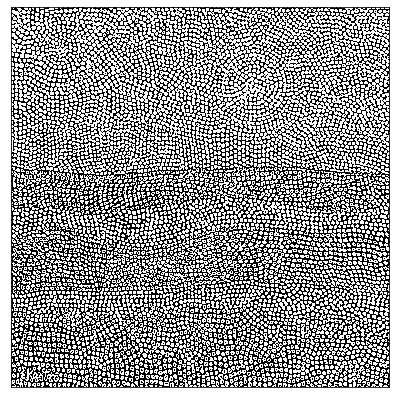

Nro. Discos: 3388 Algoritmo: local_mean-35


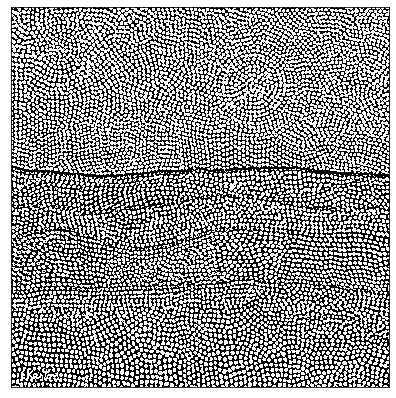

Nro. Discos: 3942 Algoritmo: local_mean-55


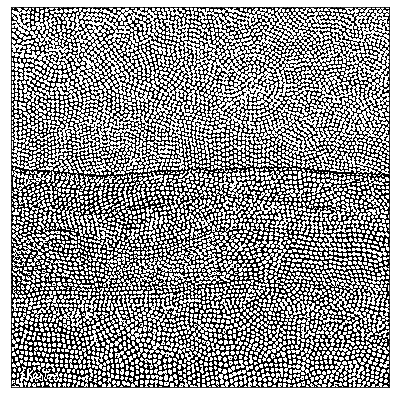

Nro. Discos: 2795 Algoritmo: val_niblack


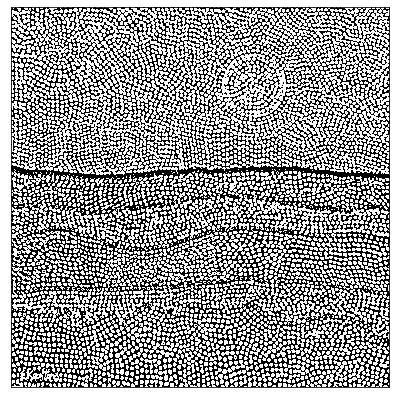

Nro. Discos: 2183 Algoritmo: val_niblack-41


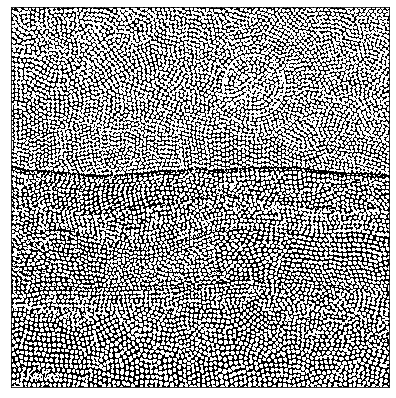

Nro. Discos: 3220 Algoritmo: img_sauvola


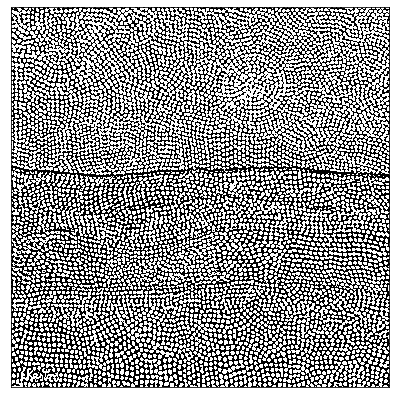

In [32]:
mostar_imagenes_totales_por_algoritmo("open_clos_imagen")

In [33]:
def open_mayor_clos_imagen(imagen,ndimesion,forma=disk):
    ndiscos = 0
    img_resultado = []
    for n in range(1,ndimesion):
        ope  =  opening(imagen, forma(n))
        for n in range(1,ndimesion):
            imagen_ndiscos =  closing(ope, forma(n))       
            total_discos = contar_regiones(imagen_ndiscos)
            if(total_discos>ndiscos):
                ndiscos = total_discos            
                img_resultado = imagen_ndiscos
    return img_resultado,ndiscos      

In [34]:
for key in imagenes_cercanas.keys():
    print(key)
    try:        
        img_resultado,ndiscos=open_mayor_clos_imagen(imagenes_cercanas[key],n_iteraciones)
        lista_algortimo_img_dicos["open_mayor_clos_imagen-"+key]={"algoritmo":key,"ndiscos":ndiscos,"imagen":img_resultado}
    except RuntimeError:
      print(" footprint array has incorrect shape")

local_mean-15
local_mean-35
local_mean-55
val_niblack
val_niblack-41
img_sauvola


Nro. Discos: 5972 Algoritmo: local_mean-15


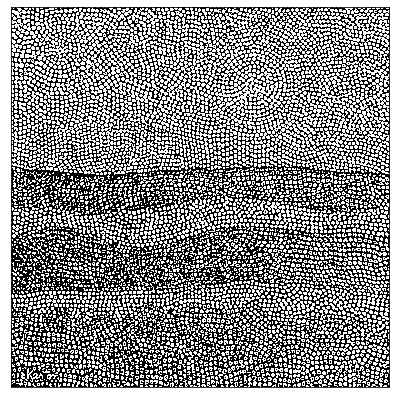

Nro. Discos: 4096 Algoritmo: local_mean-35


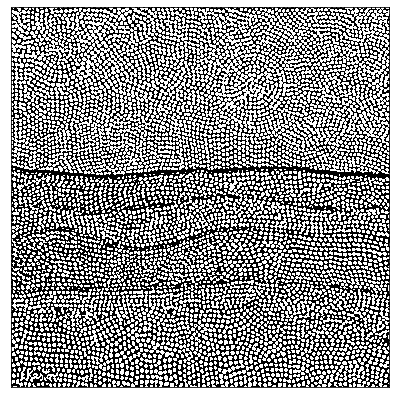

Nro. Discos: 4868 Algoritmo: local_mean-55


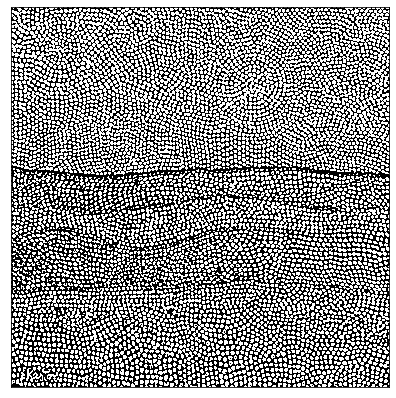

Nro. Discos: 3429 Algoritmo: val_niblack


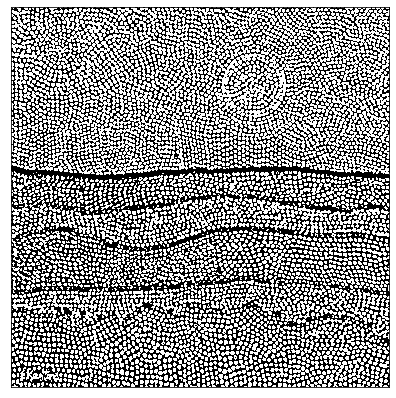

Nro. Discos: 2787 Algoritmo: val_niblack-41


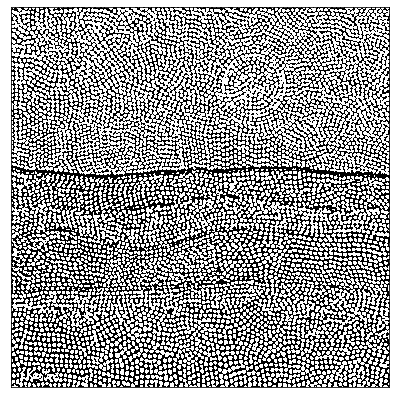

Nro. Discos: 3997 Algoritmo: img_sauvola


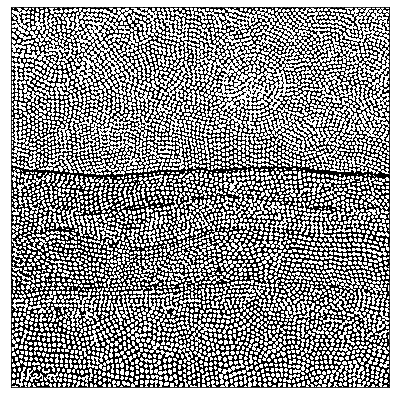

In [35]:
mostar_imagenes_totales_por_algoritmo("open_mayor_clos_imagen")

In [36]:
def mayor_open_clos_imagen(imagen,ndimesion,forma=disk):
    ndiscos = 0
    img_resultado = []
    for n in range(1,ndimesion):
        clos =  closing(imagen, forma(n))       
        for n in range(1,ndimesion):
            imagen_ndiscos  =  opening(clos, forma(n))
            total_discos = contar_regiones(imagen_ndiscos)
            if(total_discos>ndiscos):
                ndiscos = total_discos            
                img_resultado = imagen_ndiscos
    return img_resultado,ndiscos

In [37]:
for key in imagenes_cercanas.keys():
    print(key)
    try:        
        img_resultado,ndiscos=mayor_open_clos_imagen(imagenes_cercanas[key],n_iteraciones)
        lista_algortimo_img_dicos["mayor_open_clos_imagen-"+key]={"algoritmo":key,"ndiscos":ndiscos,"imagen":img_resultado}
    except RuntimeError:
      print(" footprint array has incorrect shape")

local_mean-15
local_mean-35
local_mean-55
val_niblack
val_niblack-41
img_sauvola


Nro. Discos: 6229 Algoritmo: local_mean-15


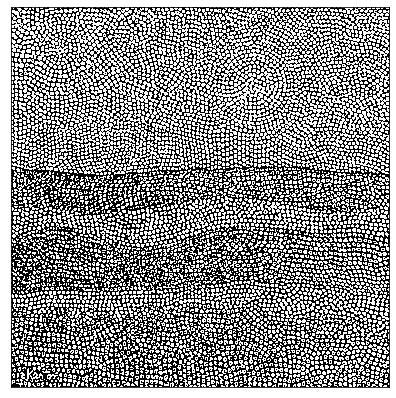

Nro. Discos: 4480 Algoritmo: local_mean-35


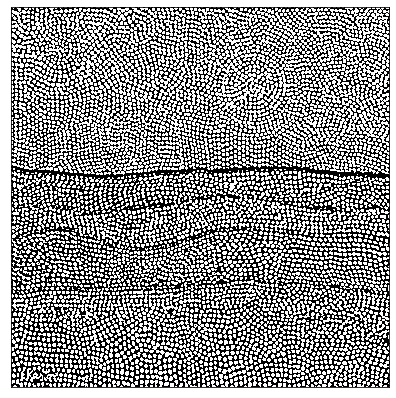

Nro. Discos: 5233 Algoritmo: local_mean-55


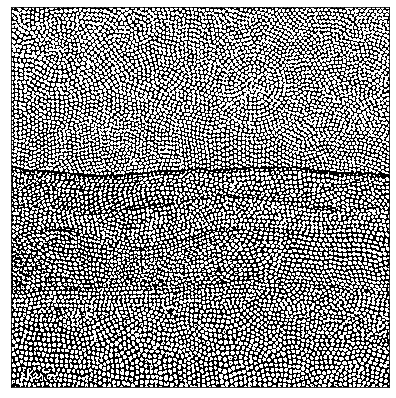

Nro. Discos: 3753 Algoritmo: val_niblack


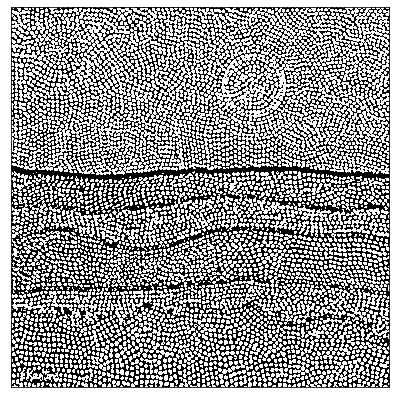

Nro. Discos: 3051 Algoritmo: val_niblack-41


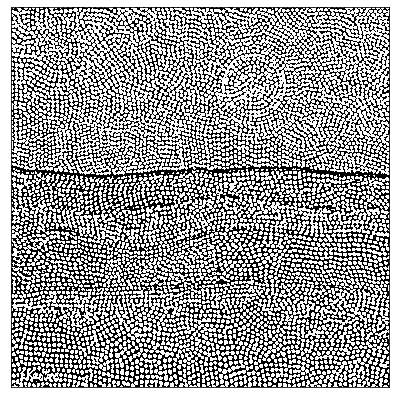

Nro. Discos: 4388 Algoritmo: img_sauvola


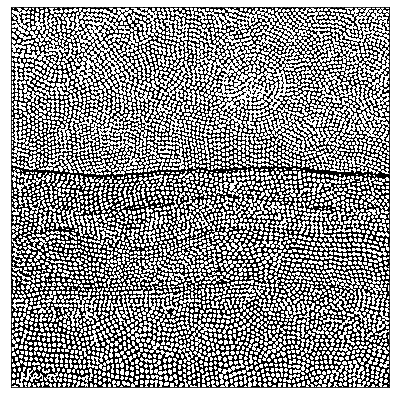

In [38]:
mostar_imagenes_totales_por_algoritmo("mayor_open_clos_imagen")

In [39]:
def eros_open_clos_imagen(imagen,ndimesion,forma=disk):
    ndiscos = 0
    img_resultado = []
    for n in range(1,ndimesion):        
        eros =  erosion(imagen, forma(n))       
        for n in range(1,ndimesion):            
            ope  =  opening(eros, forma(n))       
            imagen_ndiscos =  closing(ope, forma(n))       
            total_discos = contar_regiones(imagen_ndiscos)
            if(total_discos>ndiscos):
                ndiscos = total_discos            
                img_resultado = imagen_ndiscos
    return img_resultado,ndiscos

In [40]:
for key in imagenes_cercanas.keys():
    print(key)
    try:        
        img_resultado,ndiscos=eros_open_clos_imagen(imagenes_cercanas[key],n_iteraciones)
        lista_algortimo_img_dicos["eros_open_clos_imagen-"+key]={"algoritmo":key,"ndiscos":ndiscos,"imagen":img_resultado}
    except RuntimeError:
      print(" footprint array has incorrect shape")

local_mean-15
local_mean-35
local_mean-55
val_niblack
val_niblack-41
img_sauvola


Nro. Discos: 6654 Algoritmo: local_mean-15


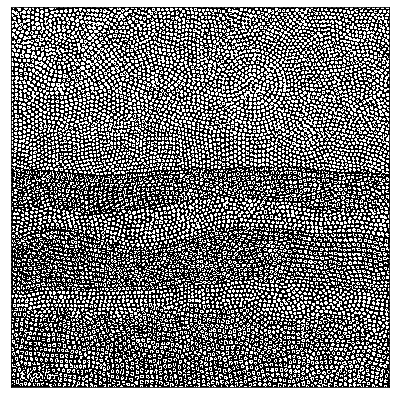

Nro. Discos: 6761 Algoritmo: local_mean-35


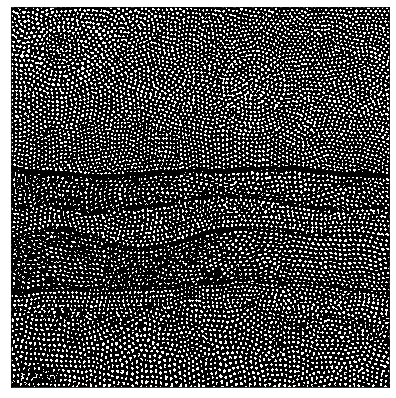

Nro. Discos: 6840 Algoritmo: local_mean-55


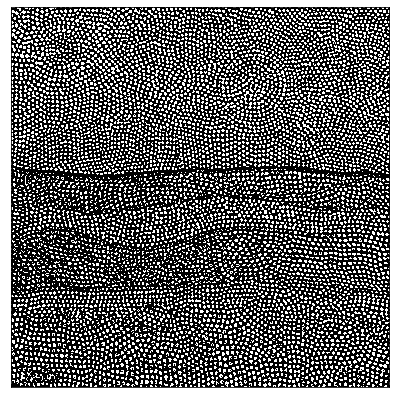

Nro. Discos: 6520 Algoritmo: val_niblack


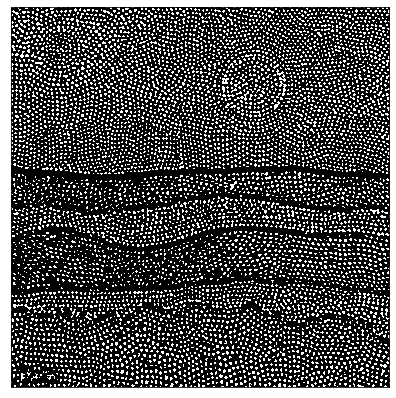

Nro. Discos: 6785 Algoritmo: val_niblack-41


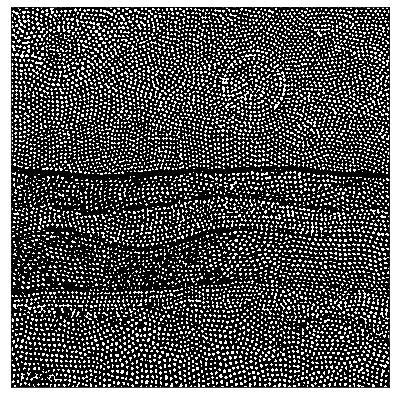

Nro. Discos: 6926 Algoritmo: img_sauvola


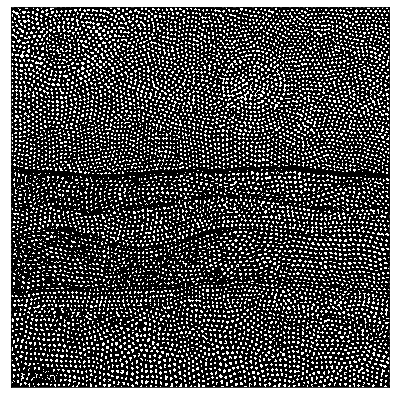

In [41]:
mostar_imagenes_totales_por_algoritmo("eros_open_clos_imagen")

In [42]:
def open_clos_eros_imagen(imagen,ndimesion,forma=disk):
    ndiscos = 0
    img_resultado = []
    for n in range(1,ndimesion):        
        ope  =  opening(imagen, forma(n))       
        clos =  closing(ope, forma(n))       
        for n in range(1,ndimesion):            
            imagen_ndiscos =  erosion(clos, forma(n))       
            total_discos = contar_regiones(imagen_ndiscos)
            if(total_discos>ndiscos):
                ndiscos = total_discos            
                img_resultado = imagen_ndiscos
    return img_resultado,ndiscos

In [43]:
for key in imagenes_cercanas.keys():
    print(key)
    try:        
        img_resultado,ndiscos=open_clos_eros_imagen(imagenes_cercanas[key],n_iteraciones)
        lista_algortimo_img_dicos["open_clos_eros_imagen-"+key]={"algoritmo":key,"ndiscos":ndiscos,"imagen":img_resultado}
    except RuntimeError:
      print(" footprint array has incorrect shape")

local_mean-15
local_mean-35
local_mean-55
val_niblack
val_niblack-41
img_sauvola


Nro. Discos: 6558 Algoritmo: local_mean-15


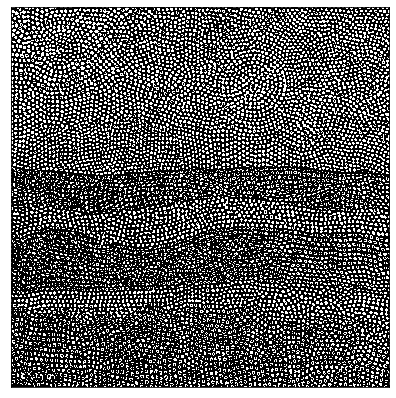

Nro. Discos: 6480 Algoritmo: local_mean-35


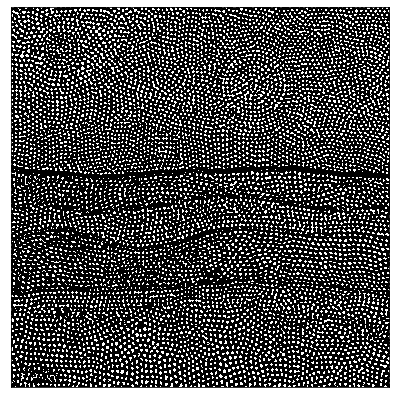

Nro. Discos: 6646 Algoritmo: local_mean-55


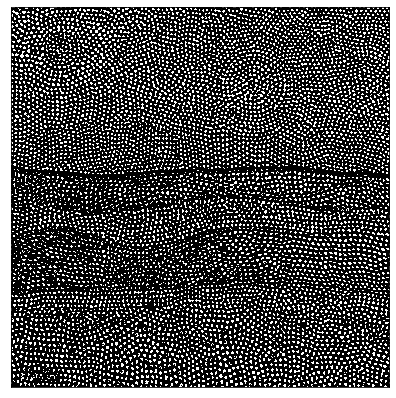

Nro. Discos: 5948 Algoritmo: val_niblack


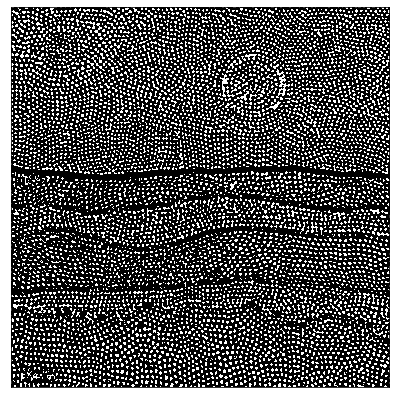

Nro. Discos: 5746 Algoritmo: val_niblack-41


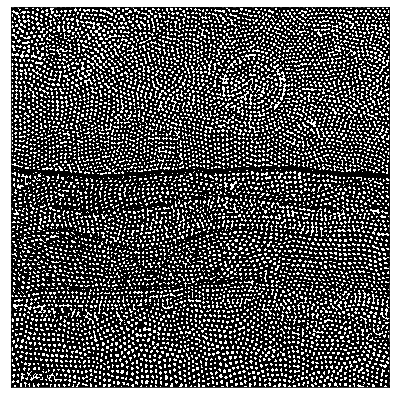

Nro. Discos: 6563 Algoritmo: img_sauvola


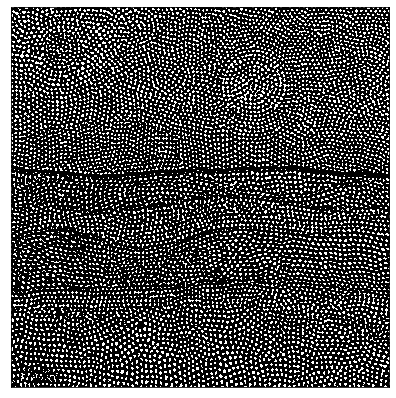

In [44]:
mostar_imagenes_totales_por_algoritmo("open_clos_eros_imagen")

In [45]:
def eros_open_clos_fill_imagen(imagen,ndimesion,forma=disk):
    ndiscos = 0
    img_resultado = []
    for n in range(1,ndimesion):            
        eros =  erosion(imagen, forma(n))          
        for n in range(1,ndimesion):
            ope  =  opening(eros, forma(n))       
            clos =  closing(ope, forma(n)) 
            imagen_ndiscos = ndi.binary_fill_holes(clos, forma(1))            
            total_discos = contar_regiones(imagen_ndiscos)
            if total_discos>ndiscos:
                ndiscos = total_discos            
                img_resultado = imagen_ndiscos
    return img_resultado,ndiscos

In [46]:
for key in imagenes_cercanas.keys():
    print(key)
    try:        
        img_resultado,ndiscos=eros_open_clos_fill_imagen(imagenes_cercanas[key],n_iteraciones)
        lista_algortimo_img_dicos["eros_open_clos_fill_imagen-"+key]={"algoritmo":key,"ndiscos":ndiscos,"imagen":img_resultado}
    except RuntimeError:
      print(" footprint array has incorrect shape")

local_mean-15
local_mean-35
local_mean-55
val_niblack
val_niblack-41
img_sauvola


Nro. Discos: 6631 Algoritmo: local_mean-15


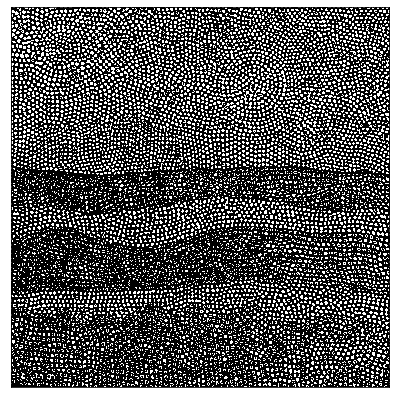

Nro. Discos: 6761 Algoritmo: local_mean-35


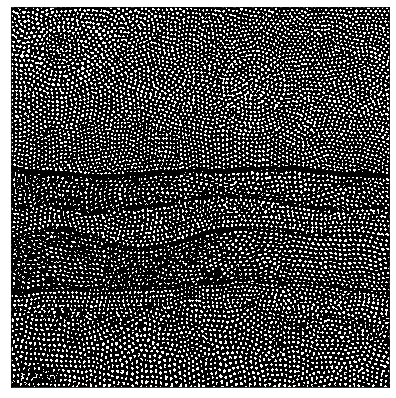

Nro. Discos: 6841 Algoritmo: local_mean-55


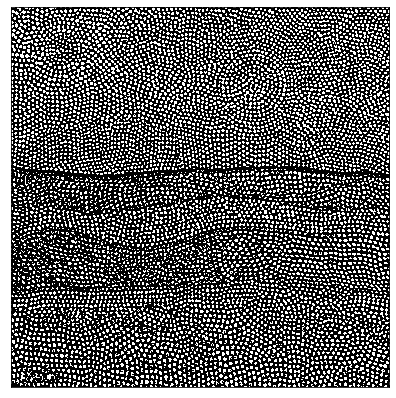

Nro. Discos: 6520 Algoritmo: val_niblack


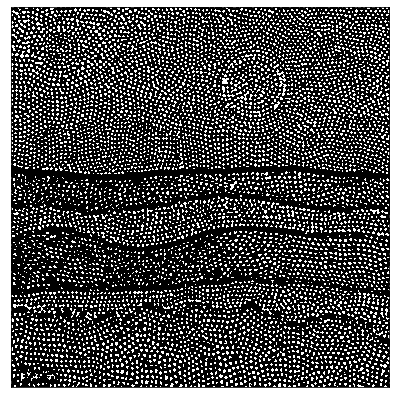

Nro. Discos: 6785 Algoritmo: val_niblack-41


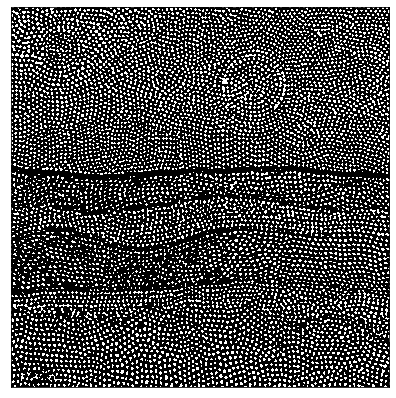

Nro. Discos: 6926 Algoritmo: img_sauvola


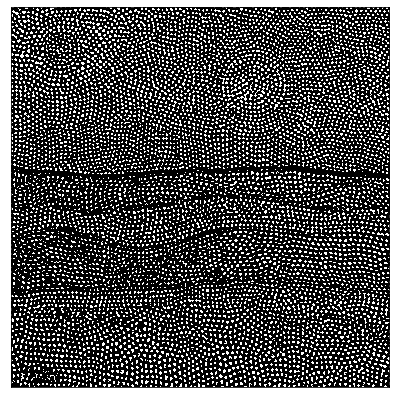

In [47]:
mostar_imagenes_totales_por_algoritmo("eros_open_clos_fill_imagen")

In [48]:
def eros_open_clos_fill_dil_imagen(imagen,ndimesion,forma=disk):
    ndiscos = 0
    img_resultado = []
    for n in range(1,ndimesion):        
        eros =  erosion(imagen, forma(n))          
        for n in range(1,ndimesion):            
            ope  =  opening(eros, forma(n))       
            clos =  closing(ope, forma(n)) 
            imfill = ndi.binary_fill_holes(clos, forma(1))
            imagen_ndiscos =  dilation(imfill, forma(1))                      
            total_discos = contar_regiones(imagen_ndiscos)
            if total_discos>ndiscos:
                ndiscos = total_discos            
                img_resultado = imagen_ndiscos
    return img_resultado,ndiscos

In [49]:
for key in imagenes_cercanas.keys():
    print(key)
    try:        
        img_resultado,ndiscos=eros_open_clos_fill_dil_imagen(imagenes_cercanas[key],n_iteraciones)
        lista_algortimo_img_dicos["eros_open_clos_fill_dil_imagen-"+key]={"algoritmo":key,"ndiscos":ndiscos,"imagen":img_resultado}
    except RuntimeError:
      print("footprint array has incorrect shape")

local_mean-15
local_mean-35
local_mean-55
val_niblack
val_niblack-41
img_sauvola


Nro. Discos: 7067 Algoritmo: local_mean-15


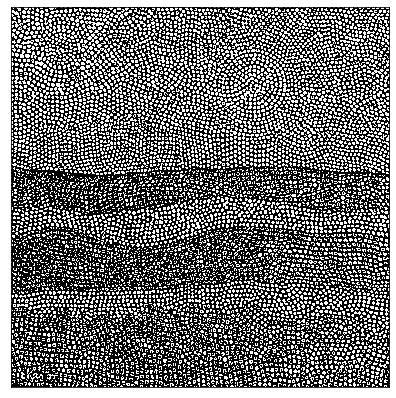

Nro. Discos: 7077 Algoritmo: local_mean-35


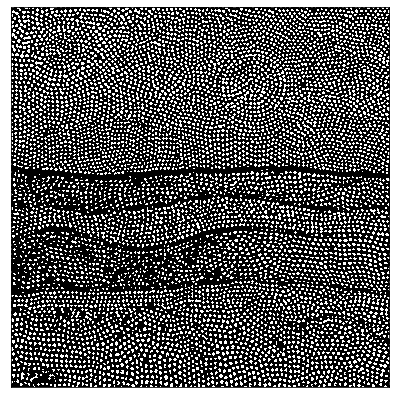

Nro. Discos: 7113 Algoritmo: local_mean-55


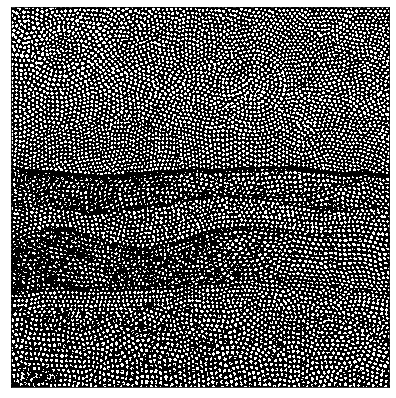

Nro. Discos: 6748 Algoritmo: val_niblack


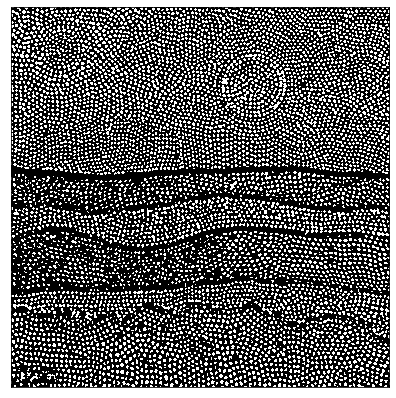

Nro. Discos: 6853 Algoritmo: val_niblack-41


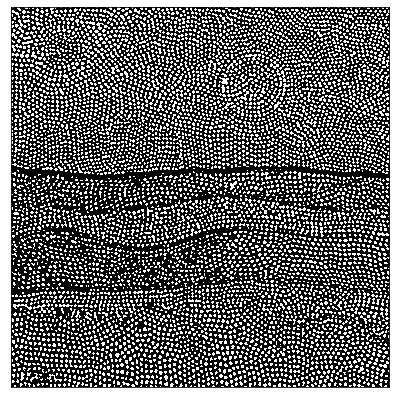

Nro. Discos: 7196 Algoritmo: img_sauvola


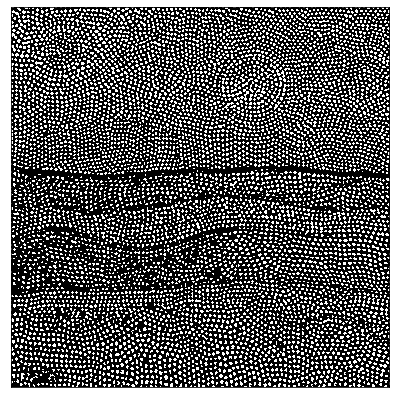

In [50]:
mostar_imagenes_totales_por_algoritmo("eros_open_clos_fill_dil_imagen")

In [51]:
def buscar_top_maximizar_puntos():
    return sorted(lista_algortimo_img_dicos.items(), key=lambda x: x[1]['ndiscos'], reverse=True)

Nro. Discos: 7196 Algoritmo: img_sauvola Método Morfología:eros_open_clos_fill_dil_imagen-img_sauvola


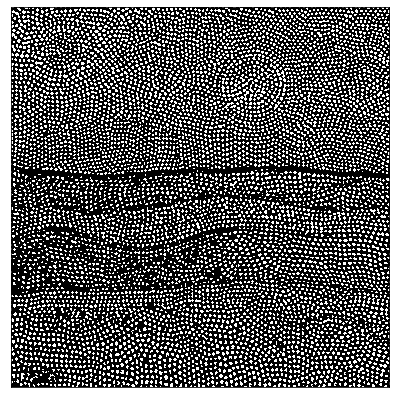

Nro. Discos: 7113 Algoritmo: local_mean-55 Método Morfología:eros_open_clos_fill_dil_imagen-local_mean-55


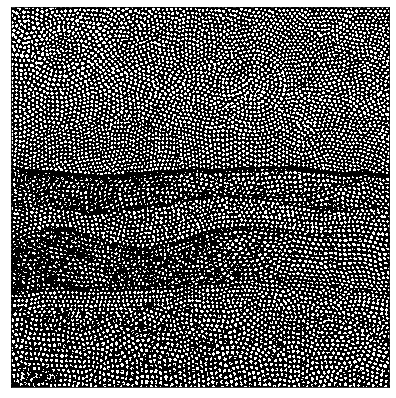

Nro. Discos: 7077 Algoritmo: local_mean-35 Método Morfología:eros_open_clos_fill_dil_imagen-local_mean-35


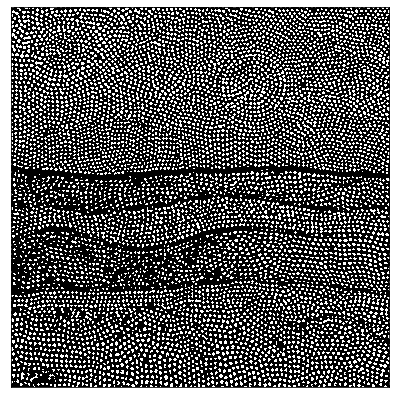

Nro. Discos: 7067 Algoritmo: local_mean-15 Método Morfología:eros_open_clos_fill_dil_imagen-local_mean-15


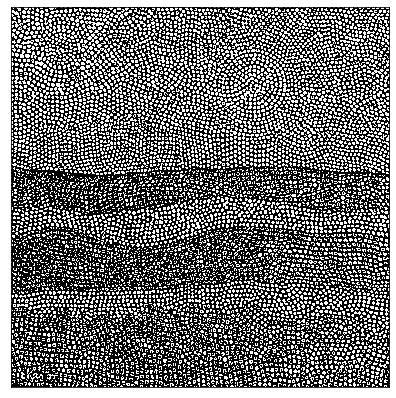

Nro. Discos: 6926 Algoritmo: img_sauvola Método Morfología:eros_open_clos_imagen-img_sauvola


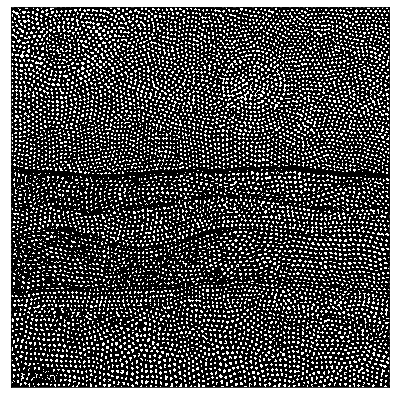

Nro. Discos: 6926 Algoritmo: img_sauvola Método Morfología:eros_open_clos_fill_imagen-img_sauvola


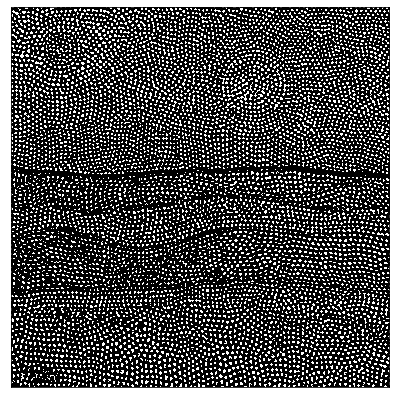

Nro. Discos: 6853 Algoritmo: val_niblack-41 Método Morfología:eros_open_clos_fill_dil_imagen-val_niblack-41


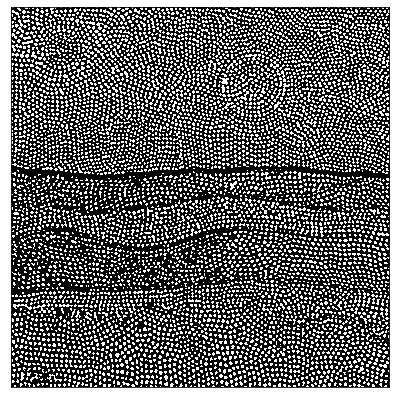

In [52]:
lista_ordenada = buscar_top_maximizar_puntos()

contador = 0
for key in lista_ordenada:
    if contador < max_top_imagenes:
        mostar_imagenes_totales_por_clave(key[0])
        contador+=1